# How has *The Queen's Gambit* impacted the popularity of online chess?

**Author:** David Zhang **Email:** dyzhang32@gmail.com

---

The queen's gambit chess opening is played at the highest levels of chess, characterised by moves: **1.d4 d5 3.c4**. [*The Queen's Gambit*](https://en.wikipedia.org/wiki/The_Queen%27s_Gambit_(miniseries)) TV show depicts Beth Harmon, a chess prodigy who struggles with drug addiction, conquer a male-dominated chess world. 

It's no secret that the popularity of *The Queen's Gambit* has caused a [recent surge in chess interest](https://www.nytimes.com/2020/11/23/arts/television/chess-set-board-sales.html). In fact, I myself am one of the victims, having been re-inspired to pick up online chess. Inevitably, this has snowballed into a bit of an addiction, having played [375 rapid games in the last month](https://www.chess.com/games/archive?gameOwner=my_game&gameType=live&gameTypeslive%5B%5D=rapid&rated=rated&endDate%5Bdate%5D=02/01/2021&startDate%5Bdate%5D=01/01/2021&timeSort=desc).

This has lead me to wonder how many other's have been bitten by *The Queen's Gambit* bug and how this would be reflected in online chess. Specifically, I expect this would be identifiable through the following metrics: 
   
   1. An increase in the **number of new players** joining online chess websites. 
   2. An increase in the **number of games played by existing users**. 
    
Here, I try to test these hypotheses using the [chess.com](https://www.chess.com/) data. 

### Importing modules and setting plot styles

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("ticks")
sns.set_context("talk")

### 1. Number of new players
---

*The Queen's Gambit* was released in the UK Netflix on the **23rd October 2020**. In order to see the impact of this on the number of players joining online chess, I'll use the chess.com API to download the UK players that have joined within a 4 month window before or after October 23rd.

To begin, let's grab the joining date of UK players. To save time here (there's >200,000 UK players and it takes ~0.5s to query each player's profile), I've randomly selected 5000 players. It's worth noting that we're limited by how accurately a user's flag reflects a user's country of residence during the period following *The Queen's Gambit* release. 

In [2]:
# parse timestamps as date times
dp = lambda x: datetime.fromtimestamp(int(x))

gb_join_dates_path = [path for path in os.listdir("data/") if "GB_players_joined" in path]

join_dates = pd.read_csv("data/" + gb_join_dates_path[0], parse_dates = ["joined"], date_parser = dp)

join_dates.head()

,user,joined
0,thinman8905,2021-01-10 14:12:00
1,johnoriel,2018-01-06 19:13:16
2,d1tjs,2020-11-16 12:18:48
3,teasingpenguin,2019-08-05 14:52:43
4,69legendlol,2020-07-20 17:29:37


With the joining dates downloaded and formatted, we can filter for those dates residing in our window of interest, namely 4 months before and after *The Queen's Gambit* release. 

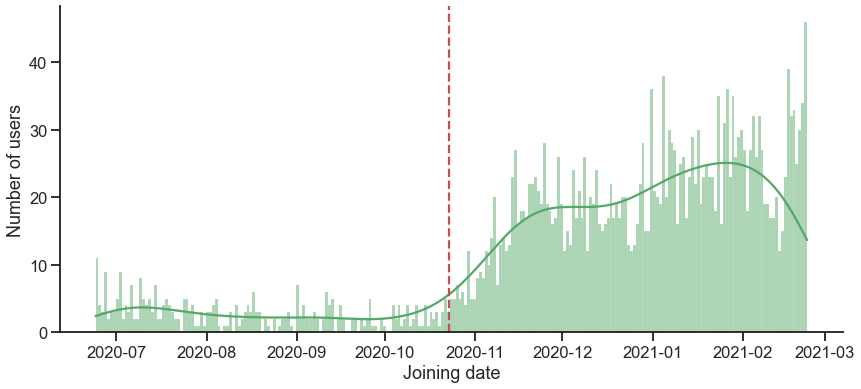

In [3]:
##### Data wrangling #####

def filter_dates_qg(join_dates, qg_date, months):
    
    earliest = qg_date - relativedelta(months = months)
    latest = qg_date + relativedelta(months = months)
    join_dates_qg = join_dates[(join_dates["joined"] >= earliest) & (join_dates["joined"] <= latest)].copy()
    
    return join_dates_qg

qg_date = datetime.strptime("2020-10-23", "%Y-%m-%d")

join_dates_qg = filter_dates_qg(join_dates, qg_date, 4)

# get number of days between our dates for use as bins
delta_days = (qg_date + relativedelta(months = 4)) - ((qg_date - relativedelta(months = 4)))
delta_days = delta_days.days

##### Plotting ######

joining_fig = sns.displot(data = join_dates_qg, x = "joined", 
                          bins = delta_days, kde = True, color = "g")
joining_fig = joining_fig.set(xlabel = "Joining date", ylabel = "Number of users")
joining_fig.fig.set_figwidth(16)
joining_fig.fig.set_figheight(6)
plt.axvline(qg_date, color = 'r', linestyle = "--")

After *The Queen's Gambit* UK release (marked with a <span style="color:red">red dashed line</span>) there's a dramatic and progressive increase in the number of user's joining chess.com (with the UK flag). Further observation would be needed to be sure, but it looks like this this explosion in user's signing up still growing to this day! 

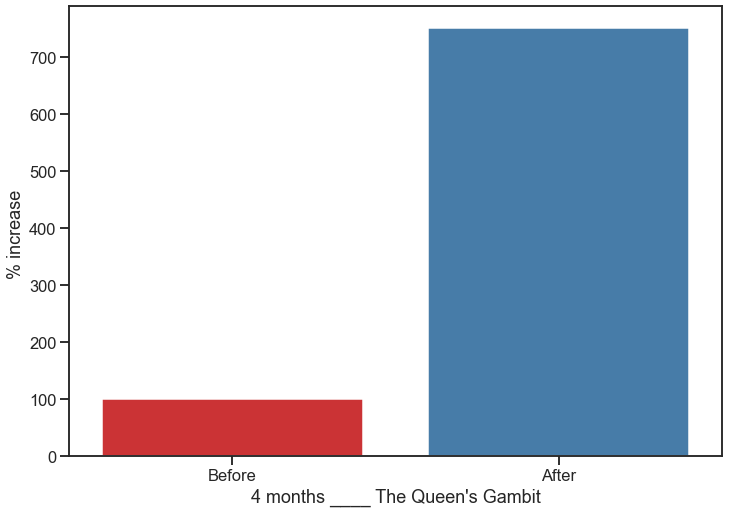

In [11]:
##### Data wrangling #####

# obtain a percentage of 
join_dates_qg.loc[: , ("qg")] = ["Before" if date <= qg_date else "After" for date in join_dates_qg['joined']]
joining_ba_qg = join_dates_qg.groupby("qg").count().reset_index()
joining_ba_qg["percent"] = (joining_ba_qg['joined']/joining_ba_qg['joined'].min()) * 100

##### Plotting #####

joining_ba_fig = sns.barplot(x = "qg", y = "percent", 
                             order = ["Before", "After"],
                             data = joining_ba_qg, 
                             palette = "Set1")

joining_ba_fig = joining_ba_fig.set(xlabel = "4 months ____ The Queen's Gambit", 
                                    ylabel = "% increase ")

As a consequence, this increase has meant there's **7x** the total number of people joining chess.com in the 4 month window after *The Queen's Gambit* release, compared to before.

The release date of shows on Netflix varies by country. This allows us to explore whether the increase in user's joining correlates with *The Queen's Gambit* release date in that country. Based off of the [unofficial Netflix online global search](http://unogs.com/title/80234304) I picked 3 countries with different release dates and 1 where Netflix is not available: 

   1. **UK**: 23rd October 2020
   2. **Italy**: 28th November 2020
   3. **Columbia**: 12th January 2021
   4. **China**: Netflix unavailable

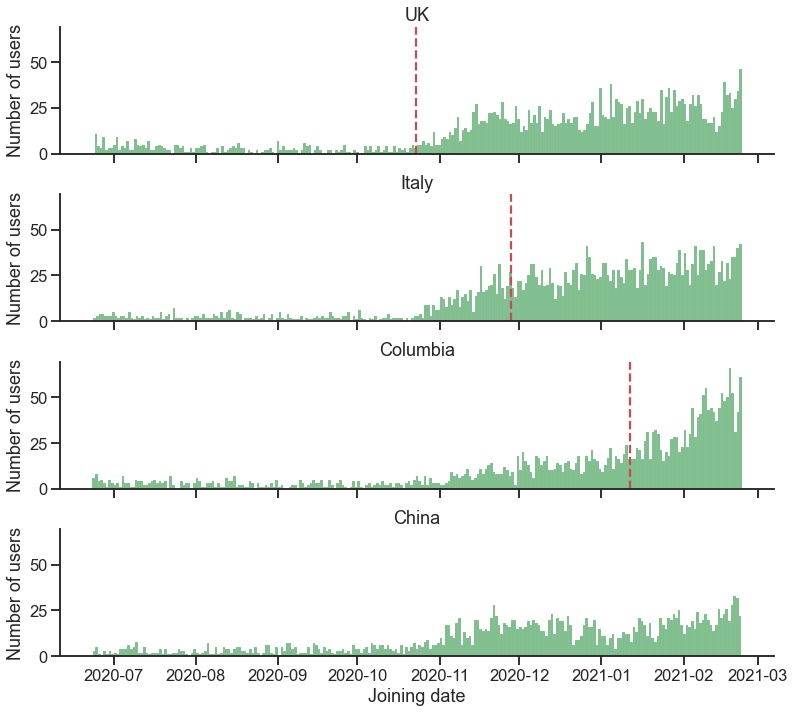

In [5]:
##### Data wrangling #####

join_dates_paths = [path for path in os.listdir("data/") if "players_joined" in path]

join_dates_all = []

# bind together join dates from all countries
for i in range(len(join_dates_paths)):

    join_dates = pd.read_csv("data/" + join_dates_paths[i], parse_dates = ["joined"], date_parser = dp)
    country = re.sub(r"_players.*", "", join_dates_paths[i])
    join_dates['country'] = country
    join_dates_all.append(join_dates)
    
join_dates_all = pd.concat(join_dates_all)

join_dates_all_qg = filter_dates_qg(join_dates_all, qg_date, 4)

##### Plotting #####

joining_all_fig = sns.FacetGrid(data = join_dates_all_qg, row = "country",
                                row_order= ["GB", "IT", "CO", "CN"])
joining_all_fig.map(sns.histplot, "joined", bins = delta_days, color = "g")
joining_all_fig.set(xlabel = "Joining date", ylabel = "Number of users")
joining_all_fig.fig.set_figwidth(18)
joining_all_fig.fig.set_figheight(10)

axes = joining_all_fig.axes.flatten()
axes[0].set_title("UK")
axes[1].set_title("Italy")
axes[2].set_title("Columbia")
axes[3].set_title("China")
axes[0].axvline(qg_date, color = 'r', linestyle = "--")
axes[1].axvline(datetime.strptime("2020-11-28", "%Y-%m-%d"), color = 'r', linestyle = "--")
axes[2].axvline(datetime.strptime("2021-01-12", "%Y-%m-%d"), color = 'r', linestyle = "--")

Again, 5000 random players have been grabbed for each country and *The Queen's Gambit* release date is marked with a <span style="color:red">red dashed line</span>. 

It is unclear whether the exact country-level *The Queen's Gambit* release date marks the point when the number of user's joining starts to increase in that respective country. That being said, we can see a shift in the peak of user's joining towards later dates in Columbia, the country with the most recent release date. Interestingly, from the 23rd October 2020 there is an increase in the number of players joining chess.com for all 4 countries. It's possible that this may be due to the availibity of VPNs and other *unofficial* methods, which can allow people to access Netflix shows outside of their country of residence. It seems that China has seen a less dramatic increase in online chess uptake, potentially due to the greater online restrictions present there. 

### 2. Number of games played by existing users
---

*The Queen's Gambit* has gained popularity with the general public as an outstanding TV show, but has arguably been an even greater hit amongst chess fans with [Magnus Carlsen endorsing it's games](https://www.youtube.com/watch?v=_ZfPa-GMxMI). Above, we explored the effect of this on the number of new players joining online, and here we focus instead on how existing user's may have had their interest in chess re-kindled by *The Queen's Gambit*. 

To address this, I'll be continuing to use the 5000 random UK users obtained above. To ensure that this analysis is not confounded by the increase number of new players joining, I've only assessed the players that have joined before September 2020 (i.e. they've been part of chess.com for at least a month before the *The Queen's Gambit* release). Then, for the 5 month window between Sep 2020 - Jan 2021, I'll obtain the number of games played per month for each of these players.

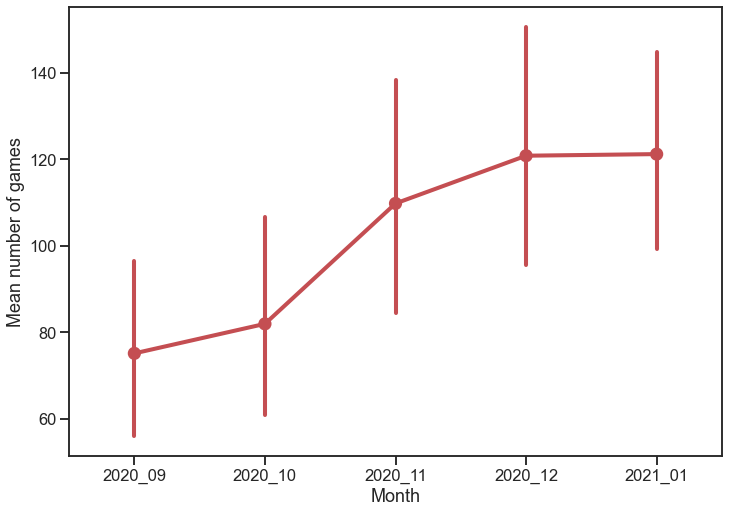

In [28]:
n_games = pd.read_csv("data/GB_n_games_27_02_2021.csv")

##### Plotting #####

g = sns.pointplot(x = 'month', 
                  y = 'n_games',
                  data = n_games,
                  estimator = np.mean, 
                  color = "r")

g = g.set(xlabel = "Month", ylabel = "Mean number of games")

From October onwards, we can see an steady rise in the median number of games played per player, suggesting *The Queen's Gambit* has taken some existing players back to the board. One caveat is that this analysis is not split by game time (e.g. bullet, blitz, rapid etc), so there's a chance that this result could be explained by a shift towards faster time controls played, but I believe this to be very slim. 

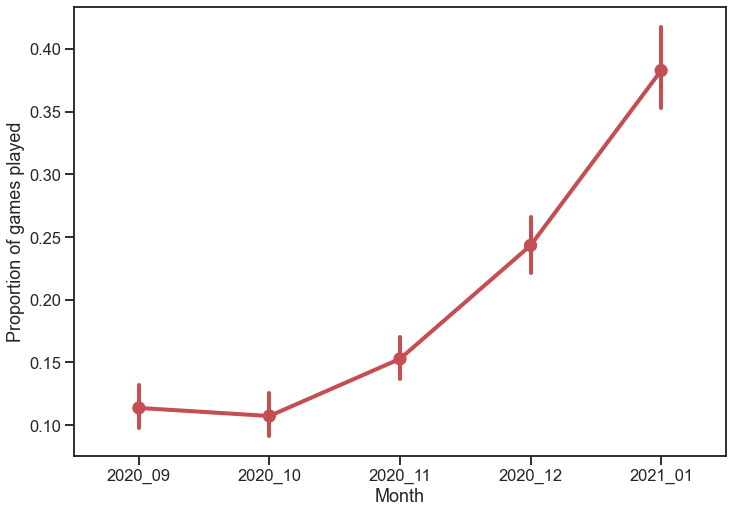

In [25]:
##### Data wrangling #####

n_games["prop_games"] = n_games.groupby(["username"]).n_games.apply(lambda x: x/np.sum(x))

# remove completely inactive players
n_games_no_inactive = n_games.loc[np.isfinite(n_games["prop_games"])]

##### Plotting #####

g = sns.pointplot(x = 'month', 
                  y = 'prop_games',
                  data = n_games_no_inactive,
                  estimator = np.mean, 
                  color = "r")

g = g.set(xlabel = "Month", ylabel = "Proportion of games played")

By normalising the number of games played per player to a proportion across the 5 month window, we can see that individually, players have increased their relative number of games played. This suggests *The Queen's Gambit* has influenced many to increase the frequency of their chess games. 

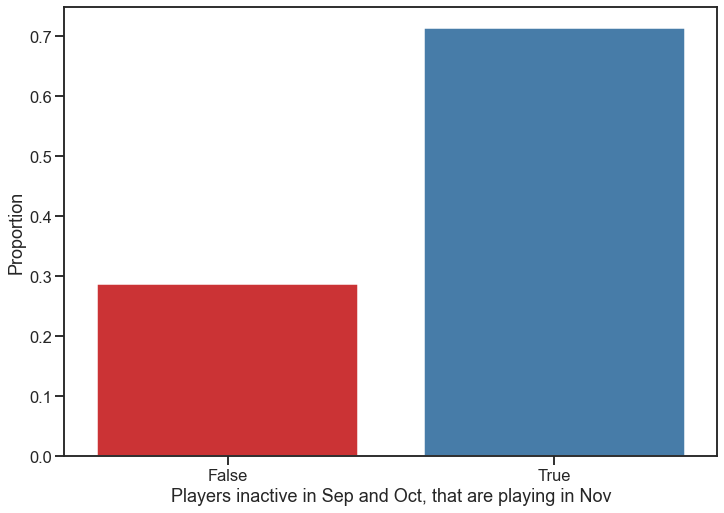

In [12]:
##### Data wrangling #####

# find which players were not playing in Sep and Oct
users_no_sep = n_games.loc[(n_games["month"] == "2020_09") & (n_games["n_games"] == 0)]["username"]
users_no_oct = n_games.loc[(n_games["month"] == "2020_10") & (n_games["n_games"] == 0)]["username"]
users_no_sep_oct = n_games.loc[n_games["username"].isin(users_no_sep) & n_games["username"].isin(users_no_oct)]

# find which players have started playing after Oct
playing_nov = users_no_sep_oct.groupby(["username"]).n_games.apply(lambda x: sum(x) != 0).reset_index()
playing_nov = playing_nov.groupby(["n_games"]).username.count().reset_index()
playing_nov["prop"] = playing_nov["username"] / np.sum(playing_nov["username"])

##### Plotting #####

g = sns.barplot(x = "n_games", 
                y = "prop", 
                data = playing_nov, 
                palette = "Set1")

g = g.set(xlabel = "Players inactive in Sep and Oct, that are playing in Nov",
          ylabel = "Proportion")

Even existing players that have taken a hiatus from chess have been nudged to return. By looking specifically at players who had not played a single game in September or October, we hone in on the population that were going through a chess dry spell. Over 70% of these players came back to play at least 1 game in November to January! This suggests that the majority of inactive players had been driven back to chess.com for at least game or two after watching *The Queen's Gambit*. 

### Conclusions
---

*The Queen's Gambit* has seen international success as a Netflix TV show, now being broadcasted in over 25 countries. This has had a dramatic impact on online chess. Here, I show that this has driven fans who have never played chess before to begin their chess journey. Alongside, existing players have been inspired to play more chess, either through a return to online chess or an increase in the number of games they play. 

*The Queen's Gambit* has caused a wave of chess enthusiasm which has spread globally, amongst new and 